## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm
import xgboost as xgb

## Load Data

In [2]:
raw_data = pd.read_csv('Wine_quality_red1.csv')
raw_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data = raw_data.copy()

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422889,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065632,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   fixed acidity                         1599 non-null   float64
 1             volatile acidity            1599 non-null   float64
 2   citric acid                           1599 non-null   float64
 3   residual sugar                        1599 non-null   float64
 4   chlorides                             1599 non-null   float64
 5   free sulfur dioxide                   1599 non-null   float64
 6   total sulfur dioxide                  1599 non-null   float64
 7   density                               1599 non-null   float64
 8   pH                                    1599 non-null   float64
 9   sulphates                             1599 non-null   float64
 10  alcohol                               1599 non-null   float64
 11  quality          

### Preprocessing the data

In [6]:
data.isnull().sum()

fixed acidity                           0
          volatile acidity              0
citric acid                             0
residual sugar                          0
chlorides                               0
free sulfur dioxide                     0
total sulfur dioxide                    0
density                                 0
pH                                      0
sulphates                               0
alcohol                                 0
quality                                 0
dtype: int64

## Exploratory Data Analysis

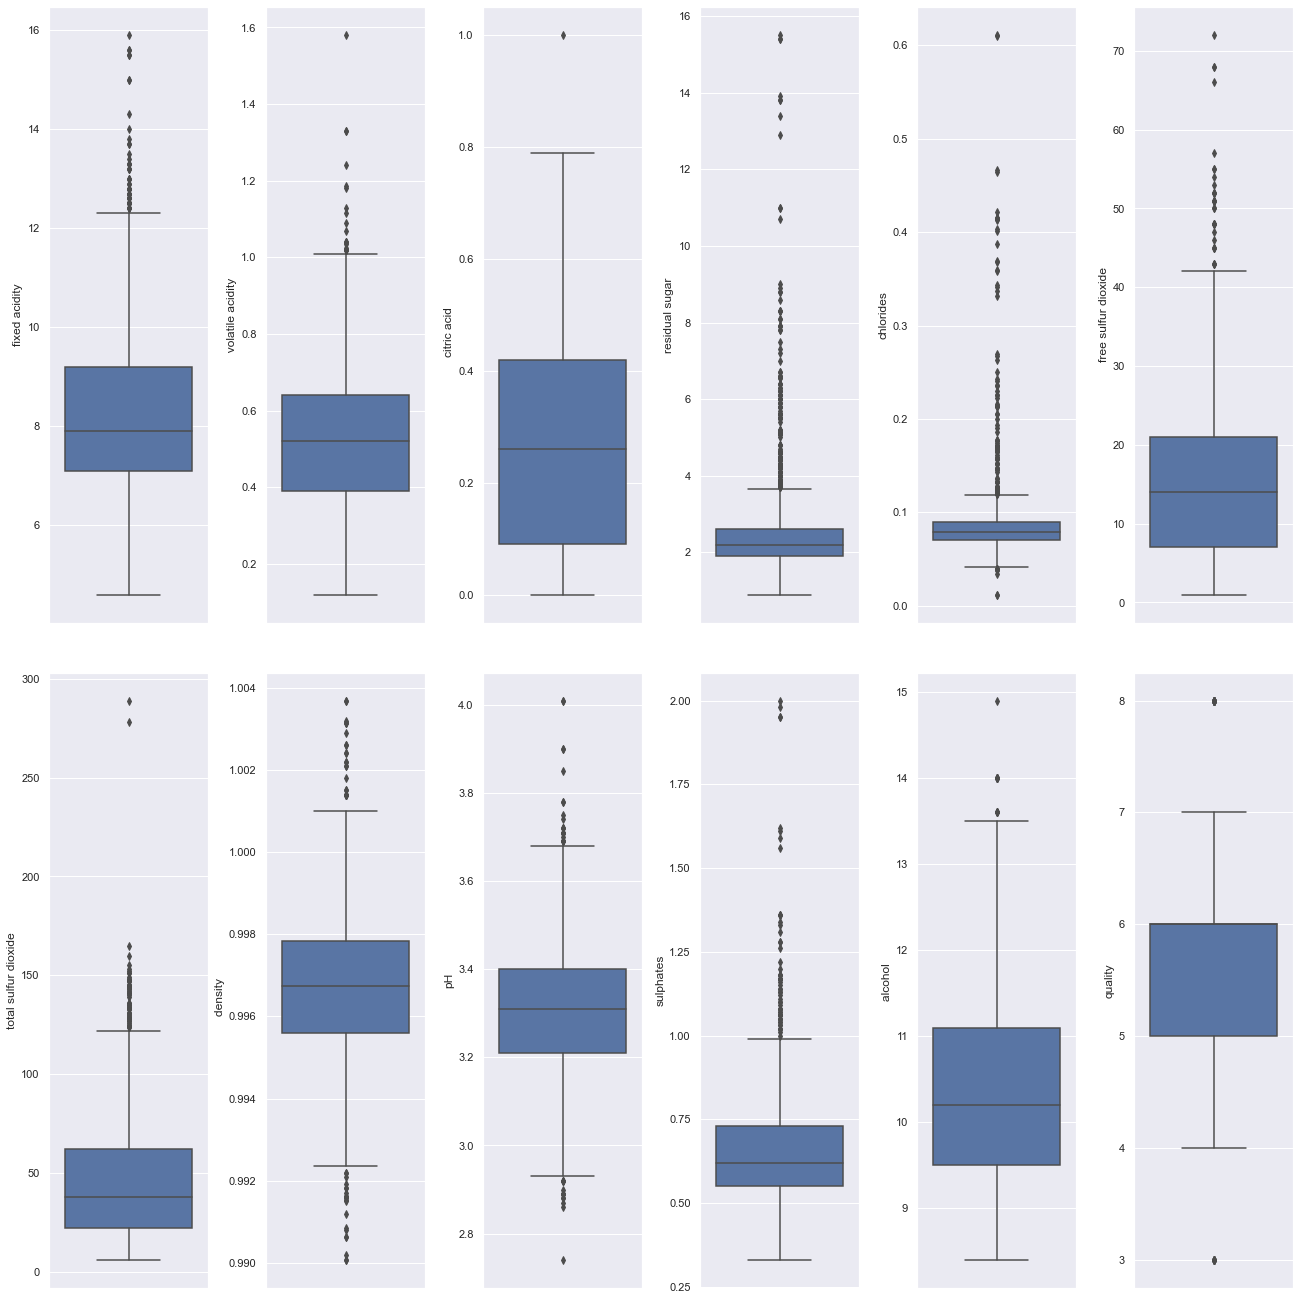

In [7]:
# Creating a box plot to check for outliers
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(18,18))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y = col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

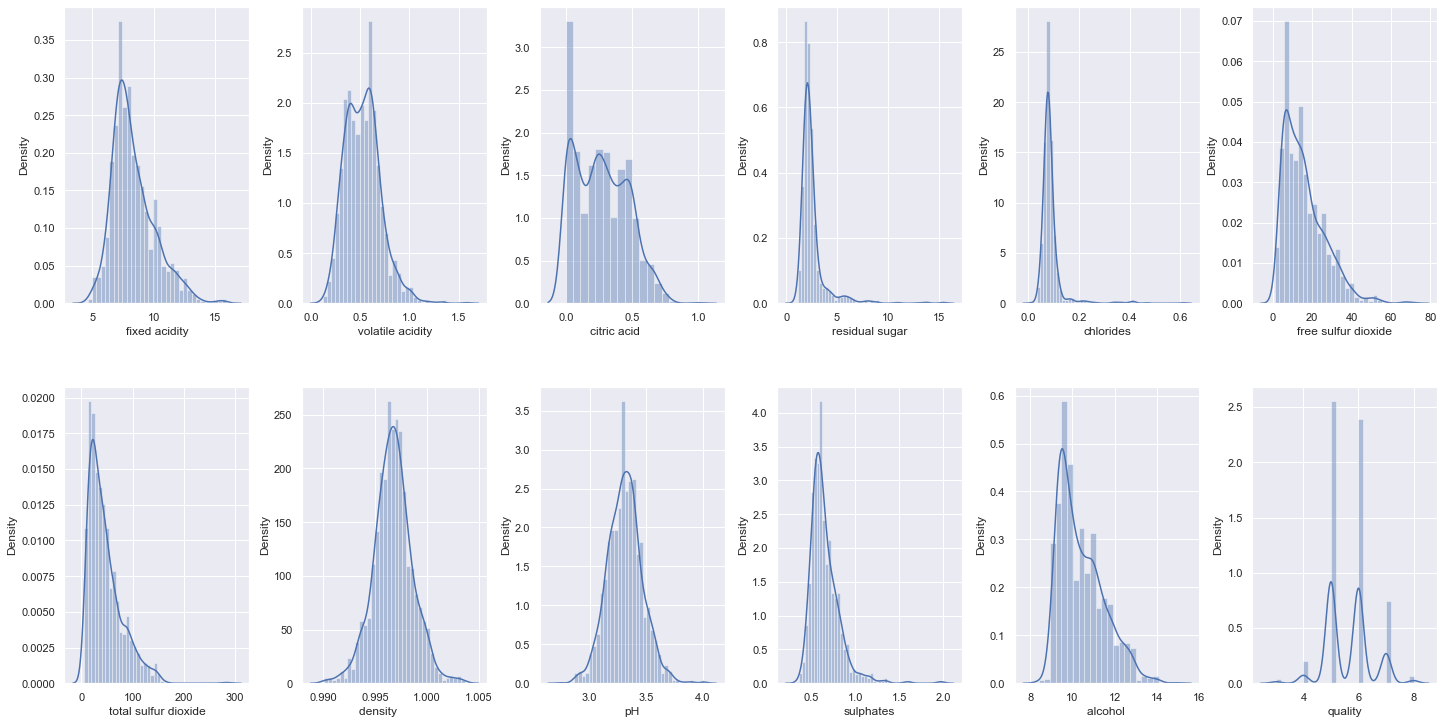

In [8]:
# Creating displot to check for distribution and skewness
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

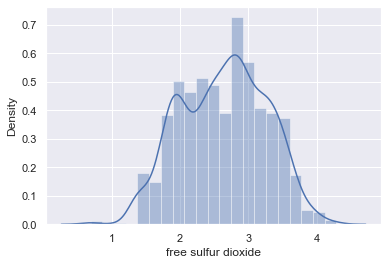

In [9]:
data['free sulfur dioxide'] = np.log(1 + data['free sulfur dioxide'])
sns.distplot(data['free sulfur dioxide'])

<AxesSubplot:xlabel='quality', ylabel='count'>

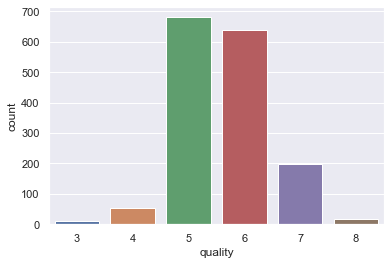

In [10]:
sns.countplot(data['quality'])

## Correlation Matrix

<AxesSubplot:>

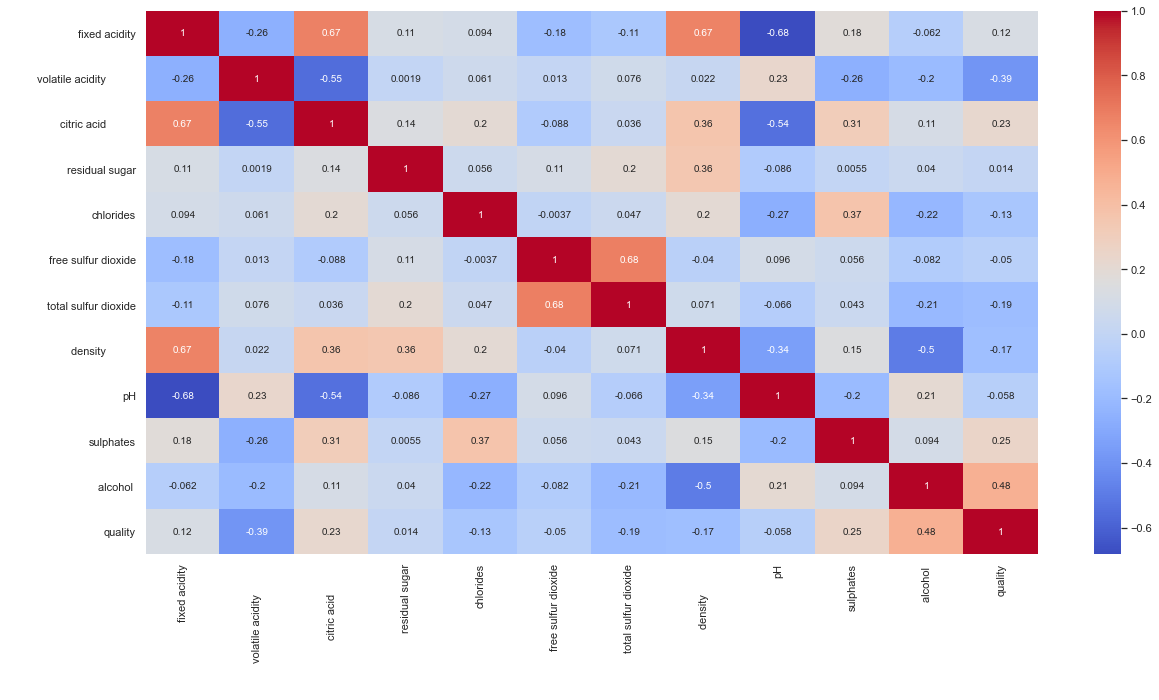

In [11]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

### Split

In [12]:
X = data.drop(columns = ['quality'])
y = data['quality']

## Class Imbalancement

In [13]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
oversample = SMOTE(k_neighbors = 4)
# Transforming the dataset

X, y = oversample.fit_resample(X,y)

In [15]:
y.value_counts()

4    681
6    681
8    681
3    681
5    681
7    681
Name: quality, dtype: int64

## Model Training

In [16]:
# Classify function
def classify(model, X, y):
    x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
    # Train model
    model.fit(x_train,y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # Cross-validation
    score = cross_val_score(model, X, y, cv = 5)
    print("CV Score:", np.mean(score)*100)

In [17]:
model = LogisticRegression()
classify(model, X, y)

Accuracy: 47.84735812133072
CV Score: 46.76968334864567


In [18]:
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 76.32093933463796
CV Score: 73.96034152020184


In [19]:
model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 84.73581213307241
CV Score: 81.37535799469106


In [20]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 85.51859099804305
CV Score: 82.03604336935474


In [21]:
model = lightgbm.LGBMClassifier()
classify(model, X, y)

Accuracy: 86.39921722113503
CV Score: 81.10652904507815


In [22]:
model = xgb.XGBClassifier()
classify(model, X, y)

[11:31:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 85.90998043052838
[11:31:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:31:40] WARNING: C:/Users/Administra